__Importing The Dependencies__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv(
r"D:\Machine Learning Projects\House Price Prediction\notebook\House_Rent_Dataset.csv"
)

__Data Preprocessing__

In [5]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
df.shape

(4746, 12)

In [7]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [11]:
# categorical cols
categorical_cols=df.select_dtypes(include="object").columns
numerical_cols=df.select_dtypes(exclude="object").columns

In [12]:
print(f"categorical cols are:{categorical_cols}")
print(f"Numerical cols are:{numerical_cols}")

categorical cols are:Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')
Numerical cols are:Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')


In [13]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [15]:
# remove useless cols
df=df.drop(columns=["Posted On","Area Locality","Point of Contact"])

In [16]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [17]:
df.shape

(4746, 9)

__Data Visualization__

In [19]:
df['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

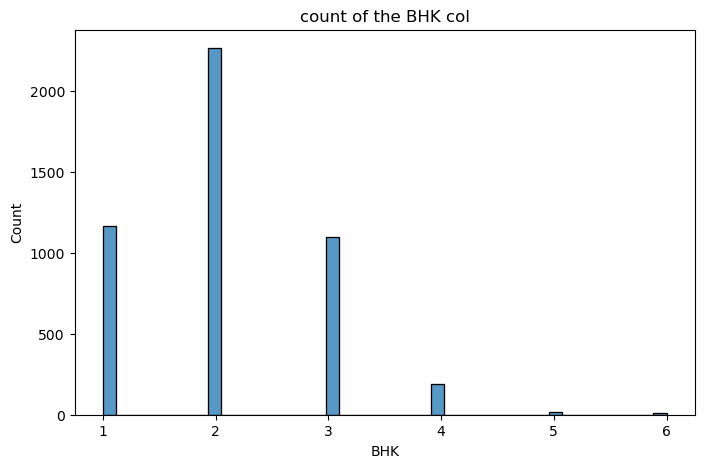

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['BHK'])
plt.title("count of the BHK col")
plt.show()

<Figure size 800x500 with 0 Axes>

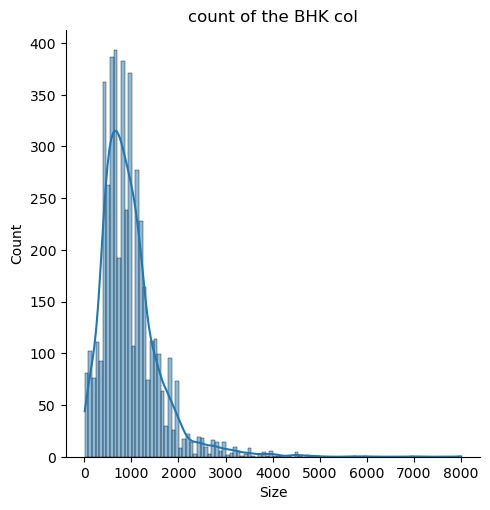

In [25]:
plt.figure(figsize=(8,5))
sns.displot(df['Size'],kde=True)
plt.title("count of the BHK col")
plt.show()

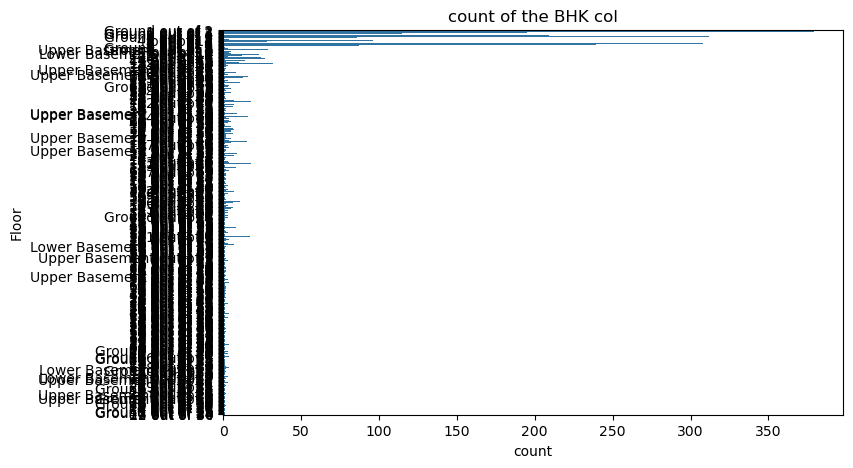

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(df['Floor'])
plt.title("count of the BHK col")
plt.show()

In [29]:
df['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [31]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

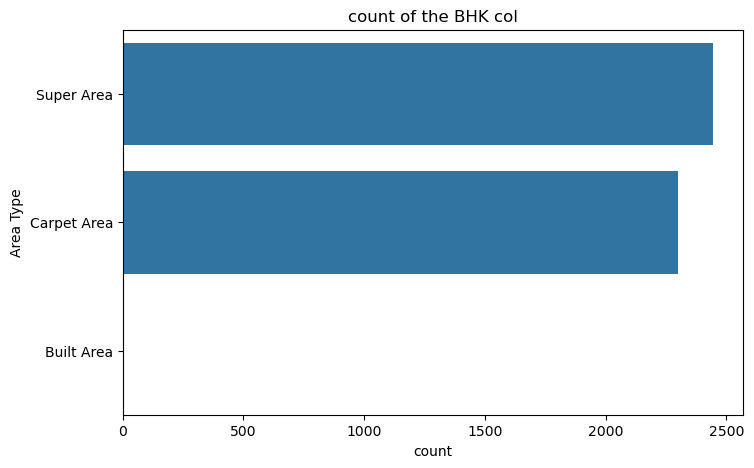

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df['Area Type'])
plt.title("count of the BHK col")
plt.show()

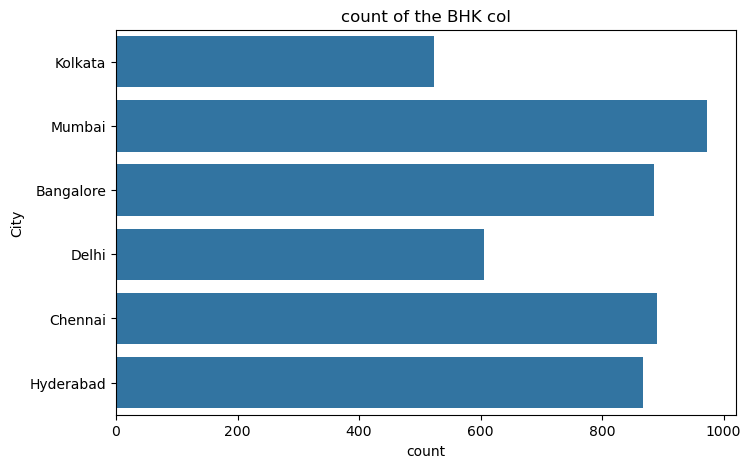

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(df['City'])
plt.title("count of the BHK col")
plt.show()

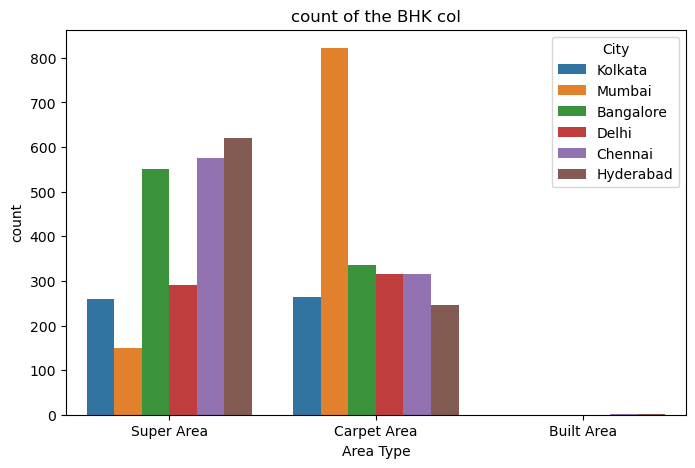

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="Area Type",hue="City")
plt.title("count of the BHK col")
plt.show()

In [35]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1


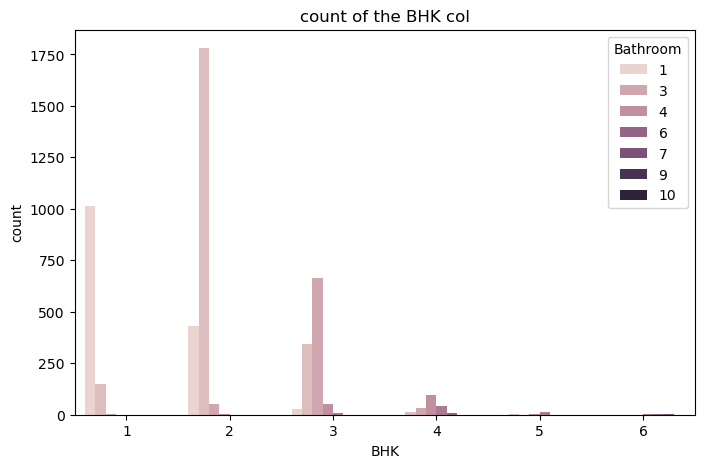

In [36]:

plt.figure(figsize=(8,5))
sns.countplot(data=df,x="BHK",hue="Bathroom")
plt.title("count of the BHK col")
plt.show()

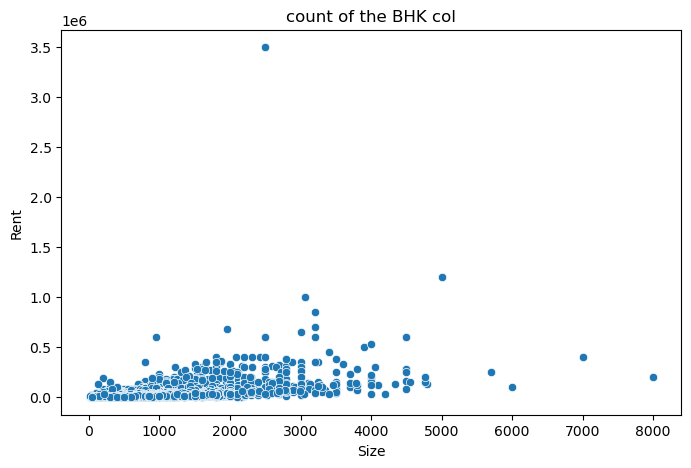

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x="Size",y="Rent")
plt.title("count of the BHK col")
plt.show()

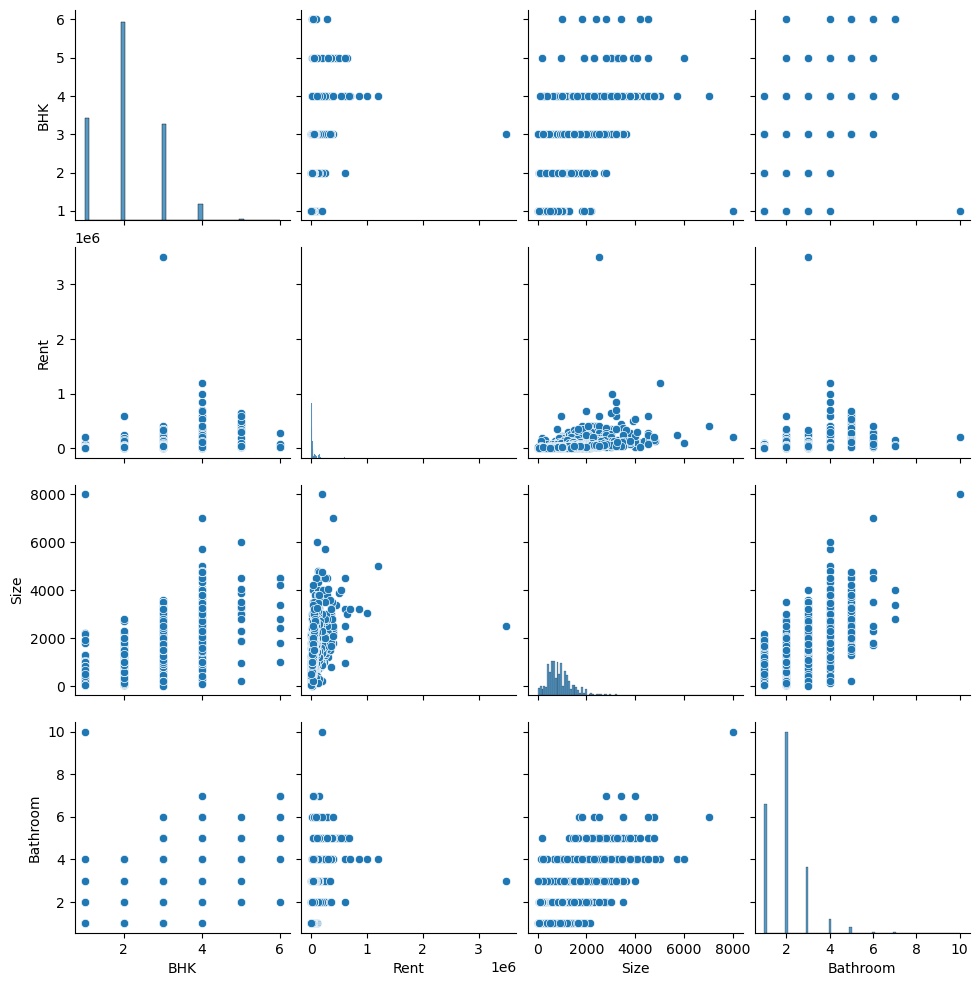

In [39]:
sns.pairplot(df)

__Feature Processing__

In [40]:
df=df.drop(columns="Floor")

In [41]:
df.head(
    
)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [42]:
cat_cols=df.select_dtypes(include="object").columns
num_cols=df.select_dtypes(exclude='object').columns

In [43]:
print(f"Categorical cols {cat_cols}")
print(f"Numerical cols:{num_cols}")


Categorical cols Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'], dtype='object')
Numerical cols:Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=label_encoder.fit_transform(df[col])
    print(df[col])

0       2
1       2
2       2
3       2
4       2
       ..
4741    2
4742    3
4743    3
4744    3
4745    2
Name: BHK, Length: 4746, dtype: int64
0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64
0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64
0       2
1       2
2       2
3       2
4       1
       ..
4741    1
4742    2
4743    1
4744    1
4745    1
Name: Area Type, Length: 4746, dtype: int32
0       4
1       4
2       4
3       4
4       4
       ..
4741    3
4742    3
4743    3
4744    3
4745    3
Name: City, Length: 4746, dtype: int32
0       2
1       1
2       1
3       2
4       2
       ..
4741    1
4742    1
4743    1
4744    1
4745    2
Name: Furnishing Status, Length: 4746, dtype: int32
0       1
1 

In [45]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,2,4,2,1,2
1,2,20000,800,2,4,1,1,1
2,2,17000,1000,2,4,1,1,1
3,2,10000,800,2,4,2,1,1
4,2,7500,850,1,4,2,0,1


In [46]:
df.shape

(4746, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   BHK                4746 non-null   int64
 1   Rent               4746 non-null   int64
 2   Size               4746 non-null   int64
 3   Area Type          4746 non-null   int32
 4   City               4746 non-null   int32
 5   Furnishing Status  4746 non-null   int32
 6   Tenant Preferred   4746 non-null   int32
 7   Bathroom           4746 non-null   int64
dtypes: int32(4), int64(4)
memory usage: 222.6 KB


In [48]:
x=df.drop(columns="Rent")
y=df['Rent']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: >

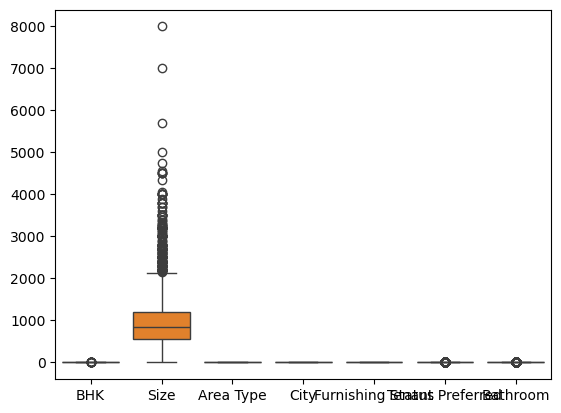

In [60]:
sns.boxplot(x_train)

<Axes: >

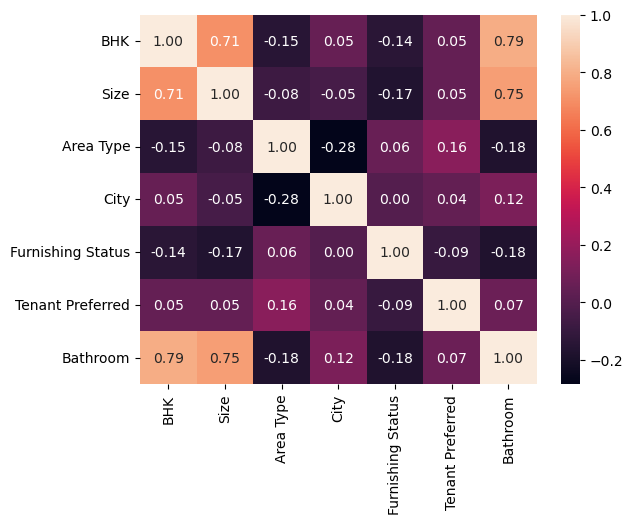

In [59]:
sns.heatmap(x_train.corr(),annot=True,fmt=".2f")

In [50]:
print(f"shape of x_train:{x_train.shape}")
print(f"shape of x_test:{x_test.shape}")
print(f"shape of y_train:{y_train.shape}")
print(f"shape of y_test:{y_test.shape}")

shape of x_train:(3796, 7)
shape of x_test:(950, 7)
shape of y_train:(3796,)
shape of y_test:(950,)


In [51]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [52]:
x_train_scaled

array([[ 1.09258214,  3.52164113,  0.97245619, ..., -0.35342157,
         0.13860023,  2.2725494 ],
       [-0.10575412, -0.27261782, -1.02615978, ...,  1.10959729,
        -1.77458691,  0.02720908],
       [-0.10575412, -0.66785313, -1.02615978, ...,  1.10959729,
         0.13860023, -1.09546108],
       ...,
       [-0.10575412, -0.49394959, -1.02615978, ..., -0.35342157,
         2.05178736,  0.02720908],
       [-0.10575412, -0.51450183,  0.97245619, ...,  1.10959729,
         0.13860023, -1.09546108],
       [ 1.09258214,  1.62451165, -1.02615978, ...,  1.10959729,
         0.13860023,  1.14987924]])

__Model Building__

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [54]:
models={
    "LinearRegression":LinearRegression(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()

}

In [55]:
def evaluate_model(y_true,y_pred):
    r2score=r2_score(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    return r2score,mse,mae

In [58]:
for model_name,model in models.items():
    # print(f"model:{model}")

    model.fit(x_train_scaled,y_train)

    y_pred_train=model.predict(x_train_scaled)
    y_pred_test=model.predict(x_test_scaled)

    r2_train,mse_train,mae_train=evaluate_model(y_train,y_pred_train)
    r2_test,mse_test,mae_test=evaluate_model(y_test,y_pred_test)

    
    print(f"Model for trian data {model_name}")
    print(f"r2 score for train data is {r2_train}")
    print(f"mse score for train data is {mse_train}")
    print(f"mae score for train data is {mae_train}")
    
    print(f"========================================================")

    print(f"Model for test data {model_name}")
    print(f"r2 score for test data is {r2_train}")
    print(f"mse score for test data is {mse_test}")
    print(f"mae score for test data is {mae_test}")
    



Model for trian data LinearRegression
r2 score for train data is 0.24746150957605173
mse score for train data is 5302164434.285766
mae score for train data is 26543.640500929218
Model for test data LinearRegression
r2 score for test data is 0.24746150957605173
mse score for test data is 1314115686.958397
mae score for test data is 23808.190424765042
Model for trian data KNeighborsRegressor
r2 score for train data is 0.5200387390864106
mse score for train data is 3381665602.2701683
mae score for train data is 12933.026396206535
Model for test data KNeighborsRegressor
r2 score for test data is 0.5200387390864106
mse score for test data is 1869822048.8589895
mae score for test data is 13749.495368421054
Model for trian data RandomForestRegressor
r2 score for train data is 0.872460961058862
mse score for train data is 898602483.2772721
mae score for train data is 6683.5493719267915
Model for test data RandomForestRegressor
r2 score for test data is 0.872460961058862
mse score for test data

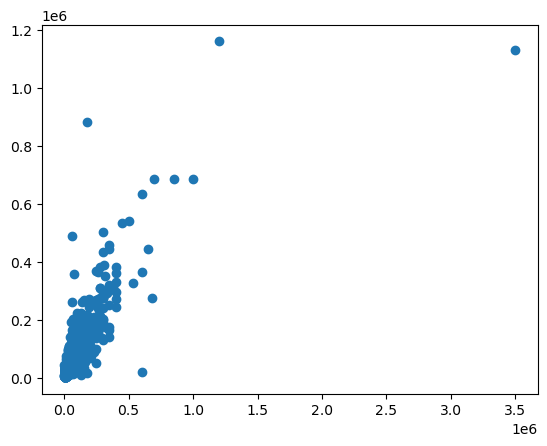

In [61]:
plt.scatter(y_train,y_pred_train)